In [84]:
using CairoMakie
using Distributions
using LaTeXStrings   # For LaTeX-style legends
using Colors

colors = distinguishable_colors(1, [RGB(1, 1, 1), RGB(0, 0, 0)], dropseed=true)

# Function to calculate Beta distribution and confidence interval
function define_beta_distribution(c, k, prior, real)
    # Parameters for Beta distribution
    alpha = c * real + prior
    alpha0 = c + k * prior
    beta = alpha0 - alpha

    # Compute 95% confidence interval bounds
    beta_dist = Beta(alpha, beta)
    lower_bound = quantile(beta_dist, 0.025)
    upper_bound = quantile(beta_dist, 0.975)

    return (beta_dist, lower_bound, upper_bound)
end

# Function to create a plot for a specific configuration
function plot_configuration(k, prior, c_values, fig_title, real, ylim=nothing)
    fig = Figure(resolution=(400,300))
    ax = Axis(fig[1, 1], title=fig_title, xlabel=L"\hat{\theta}_i", ylabel=L"p(\hat{\theta}) = \text{Beta}( \alpha_i, \alpha_0 - \alpha_i)")
    vlines!(ax, [real], color=:black, linestyle=:dash, label=L"\theta")

    n_vals = length(c_values)
    colors = distinguishable_colors(n_vals, [RGB(1, 1, 1), RGB(0, 0, 0)], dropseed=true)
    for (i, c) in enumerate(c_values)
        beta_dist, lower_bound, upper_bound = define_beta_distribution(c, k, prior, real)

        println("c = $c, k = $k, prior = $prior")
        println("95% CI width: $(upper_bound-lower_bound)")

        x = 0:0.0001:1
        y = pdf(beta_dist, x)

        # Separate the credible interval and the rest of the line
        ci_x = x[(x .>= lower_bound) .& (x .<= upper_bound)]
        ci_y = pdf(beta_dist, ci_x)

        full = pdf(beta_dist, x)

        lines!(ax, x, full, color=(colors[i], 0.2), linewidth=2)
        # Plot credible interval with full opacity
        lines!(ax, ci_x, ci_y, color=colors[i], linewidth=2, alpha=1.0, label=L"c=$%$c$")
    end
    if ylim != nothing
        ylims!(ax, ylim)
    end

    axislegend(ax)
    display(fig)
    if typeof(prior) == Float64
        prior = round(prior, digits=3)
    end
    save("plot_$(k)_$(prior)_$(real).png", fig)
end


plot_configuration (generic function with 2 methods)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/Y3ABD/src/scenes.jl:238


c = 1, k = 5, prior = 1
95% CI width: 0.6263122517715719
c = 10, k = 5, prior = 1
95% CI width: 0.4821460169003325
c = 100, k = 5, prior = 1
95% CI width: 0.18354787613232426
c = 1000, k = 5, prior = 1
95% CI width: 0.05902004709668007


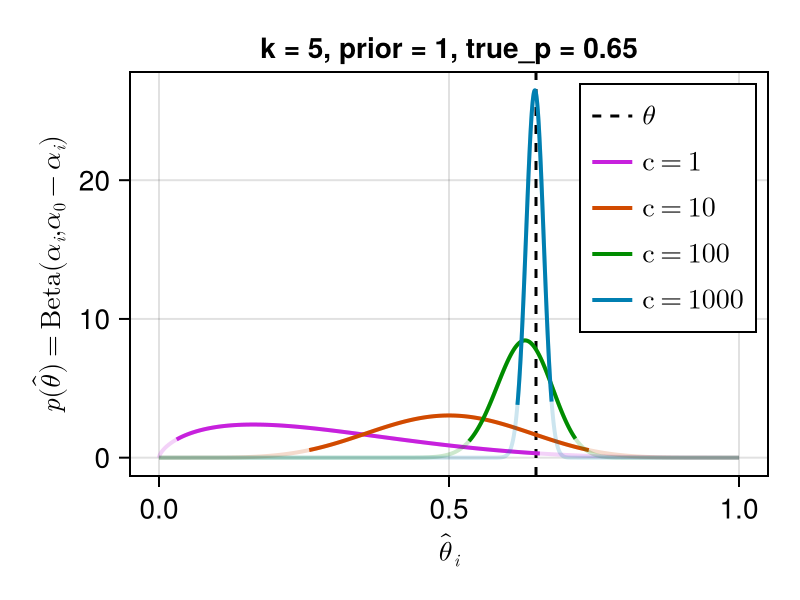

CairoMakie.Screen{IMAGE}


In [85]:
k = 5
prior = 1
c_values = [1, 10, 100, 1000]
r = 0.65
plot_configuration(k, prior, c_values, "k = $k, prior = $prior, true_p = $r", r)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/Y3ABD/src/scenes.jl:238


c = 1, k = 5, prior = 1
95% CI width: 0.5747645137154296
c = 10, k = 5, prior = 1
95% CI width: 0.42408635874134426
c = 100, k = 5, prior = 1
95% CI width: 0.17320307407423063
c = 1000, k = 5, prior = 1
95% CI width: 0.05659296981902101


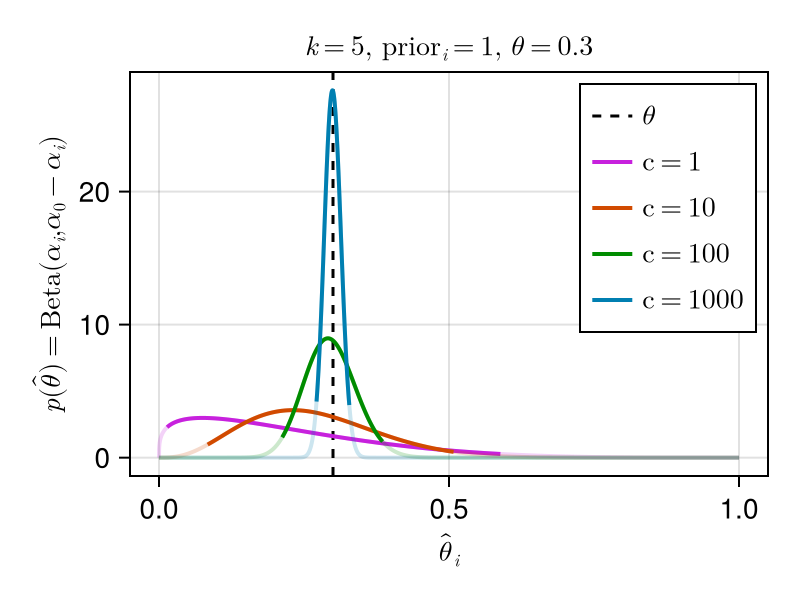

CairoMakie.Screen{IMAGE}


In [88]:
k = 5
prior = 1
c_values = [1, 10, 100, 1000]
r = 0.3
plot_configuration(k, prior, c_values, L"k=%$k,\ \text{prior}_i=%$prior,\ \theta=%$r", r)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/Y3ABD/src/scenes.jl:238


c = 1, k = 1500, prior = 1
95% CI width: 0.00314745987433775
c = 10, k = 1500, prior = 1
95% CI width: 0.006767135186897941
c = 100, k = 1500, prior = 1
95% CI width: 0.01873428841112183
c = 1000, k = 1500, prior = 1
95% CI width: 0.03349051988161547
c = 10000, k = 1500, prior = 1
95% CI width: 0.018258207840234797
c = 100000, k = 1500, prior = 1
95% CI width: 0.006048866398235431


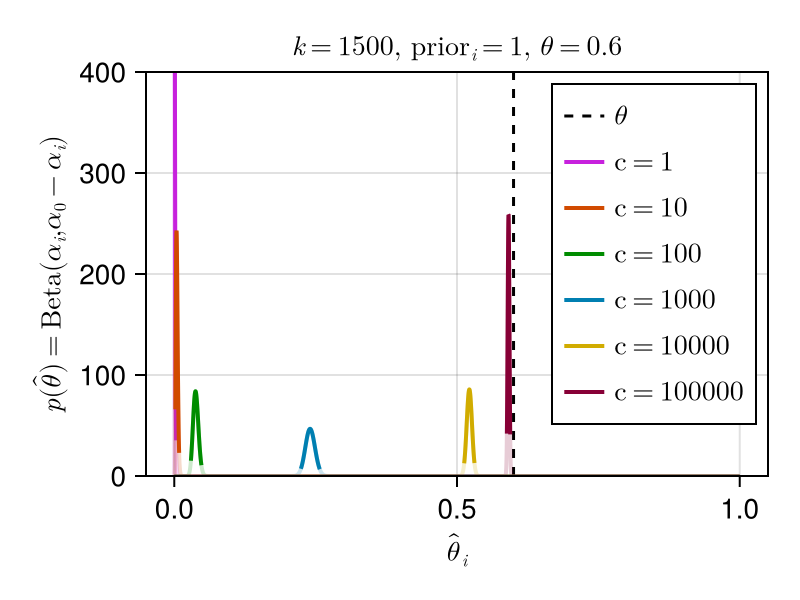

CairoMakie.Screen{IMAGE}


In [89]:

k = 1500
prior = 1
c_values = [1, 10, 100, 1000, 10000, 100000]
r = 0.6
plot_configuration(k, prior, c_values, L"k=%$k,\ \text{prior}_i=%$prior,\ \theta=%$r", r, [0,400])

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/Y3ABD/src/scenes.jl:238


c = 1, k = 1500, prior = 1
95% CI width: 0.002693830696654715
c = 10, k = 1500, prior = 1
95% CI width: 0.0043692748608264
c = 100, k = 1500, prior = 1
95% CI width: 0.011103947689858534
c = 1000, k = 1500, prior = 1
95% CI width: 0.02130429538603755
c = 10000, k = 1500, prior = 1
95% CI width: 0.01385661620968312
c = 100000, k = 1500, prior = 1
95% CI width: 0.0048941481054628755


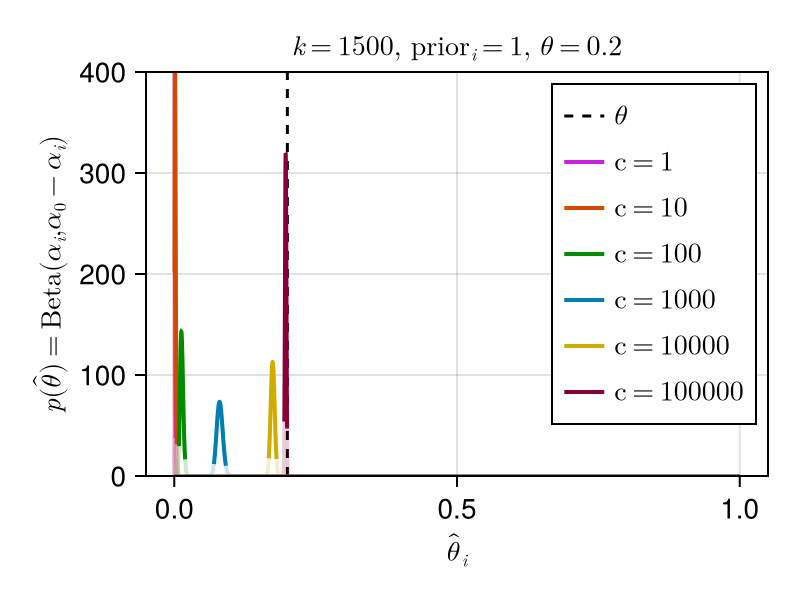

CairoMakie.Screen{IMAGE}


In [90]:

k = 1500
prior = 1
c_values = [1, 10, 100, 1000, 10000, 100000]
r = 0.2
plot_configuration(k, prior, c_values, L"k=%$k,\ \text{prior}_i=%$prior,\ \theta=%$r", r, [0,400])

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/Y3ABD/src/scenes.jl:238


c = 1, k = 1500, prior = 0.0033333333333333335
95% CI width: 0.42858432627380477
c = 10, k = 1500, prior = 0.0033333333333333335
95% CI width: 0.477696711569745
c = 100, k = 1500, prior = 0.0033333333333333335
95% CI width: 0.1844760650846632
c = 1000, k = 1500, prior = 0.0033333333333333335
95% CI width: 0.05905784123200852


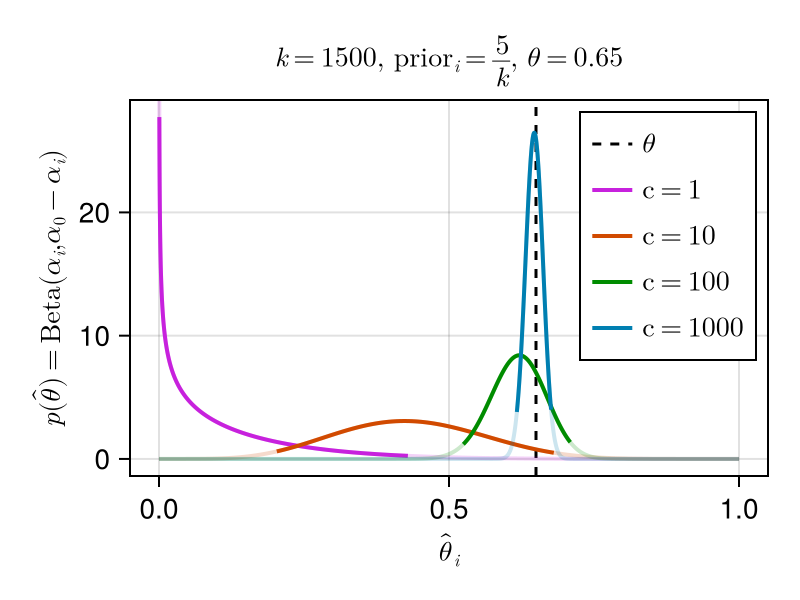

CairoMakie.Screen{IMAGE}


In [91]:

k = 1500
prior = 5 / k
c_values = [1, 10, 100, 1000]
r = 0.65
plot_configuration(k, prior, c_values, L"k=%$k,\ \text{prior}_i=\frac{5}k,\ \theta=%$r", r)

c = 1, k = 1500, prior = 0.0033333333333333335
95% CI width: 0.2997525672708041
c = 10, k = 1500, prior = 0.0033333333333333335
95% CI width: 0.38171789449689136
c = 100, k = 1500, prior = 0.0033333333333333335
95% CI width: 0.17152652892719578
c = 1000, k = 1500, prior = 0.0033333333333333335
95% CI width: 0.05653913190182969


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/Y3ABD/src/scenes.jl:238


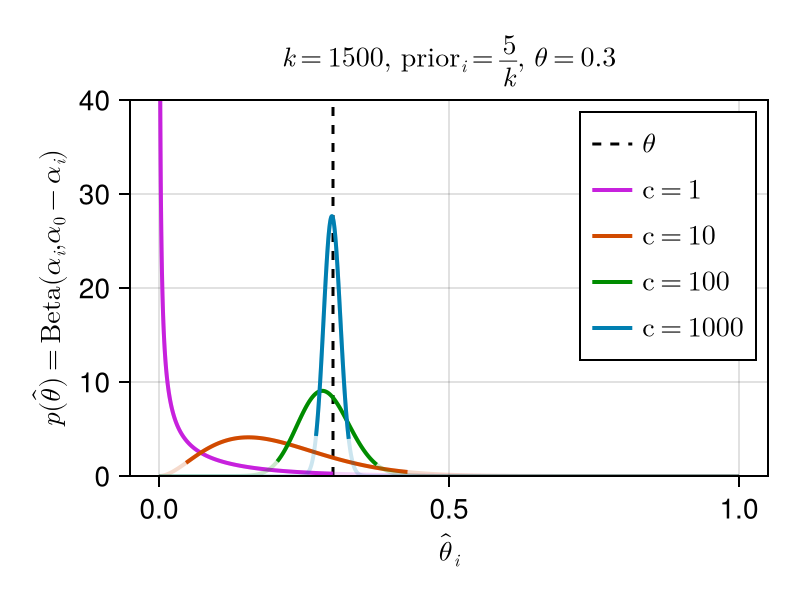

CairoMakie.Screen{IMAGE}


In [92]:

k = 1500
prior = 5 / k
c_values = [1, 10, 100, 1000]
r = 0.3
plot_configuration(k, prior, c_values, L"k=%$k,\ \text{prior}_i=\frac5k,\ \theta=%$r", r, [0,40])